Project 9: A Data Analysis of Your Own

Name: Henok & Tenzin

Sources: Prof.Jordan, google, chat GPT

In [4]:
import requests
import json
from bs4 import BeautifulSoup

from urllib.parse import unquote, quote
from datetime import datetime

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#creating a dataframe for the corruption
forbes_df= pd.read_csv('forbes_2022_billionaires.csv')
forbes_df

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,2578,Zhang Yuqiang,66.0,1000.0,2022,4,Manufacturing,Fiberglass,China,NaN,...,NaN,True,M,1955-09-01,NaN,NaN,NaN,NaN,"Zhang Yuqiang chairs Zhenshi Holding Group, a ...",NaN
2664,2578,Zhou Ruxin,59.0,1000.0,2022,4,Technology,Navigation,China,NaN,...,NaN,True,M,1963-03-01,NaN,NaN,NaN,NaN,"Zhou Ruxin chairs Beijing BDStar Navigation, a...",NaN
2665,2578,Wen Zhou & family,57.0,1000.0,2022,4,Manufacturing,chemicals,China,NaN,...,NaN,True,M,1965-03-06,NaN,NaN,NaN,NaN,"Zhou Wen chairs Shanghai Pret Composites, a su...",NaN
2666,2578,Zhou Yifeng & family,43.0,1000.0,2022,4,Energy,liquefied petroleum gas,China,NaN,...,NaN,True,F,1978-07-11,NaN,NaN,NaN,NaN,Zhou Yifeng chairs Shenzhen-listed Oriental En...,NaN


In [6]:
print(forbes_df.columns.tolist())

['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category', 'source', 'country', 'state', 'city', 'countryOfCitizenship', 'organization', 'selfMade', 'gender', 'birthDate', 'title', 'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio', 'about']


In [7]:
##needs fixes
richest= forbes_df[forbes_df['rank']=='1']["personName"]
print(richest)

Series([], Name: personName, dtype: object)


Finance & Investments         392
Technology                    343
Manufacturing                 337
Fashion & Retail              250
Healthcare                    217
Food & Beverage               203
Real Estate                   193
Diversified                   180
Media & Entertainment          99
Energy                         95
Automotive                     70
Metals & Mining                68
Service                        53
Construction & Engineering     46
Telecom                        37
Logistics                      35
Sports                         27
Gambling & Casinos             23
Name: category, dtype: int64


<AxesSubplot:>

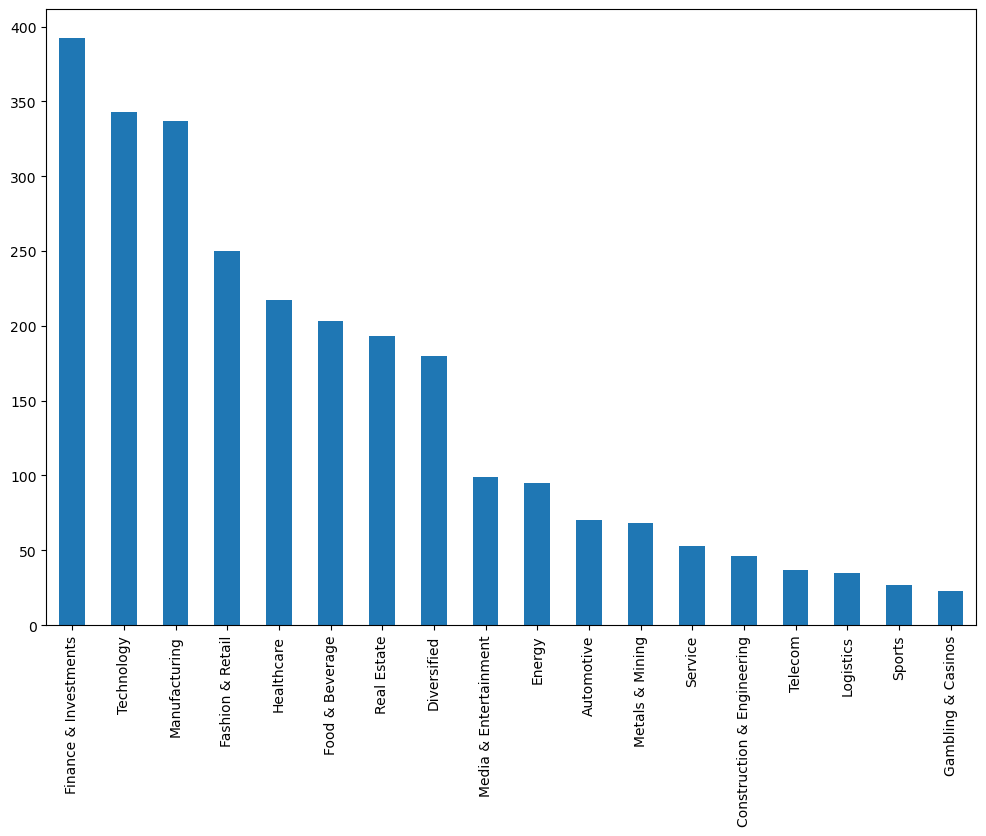

In [28]:
# # From .info() we can see that there are 2668 rows or billionares on the total dataset
# ## There are 2668 billionaires in the world 

r=forbes_df["category"].value_counts()

print(r)


# ## From the above value counts we can see that Finace and investment has the most billions by having 392 billions followed by Tech
r.plot(kind='bar', x='x', y='r', figsize=(12, 8))


<AxesSubplot:>

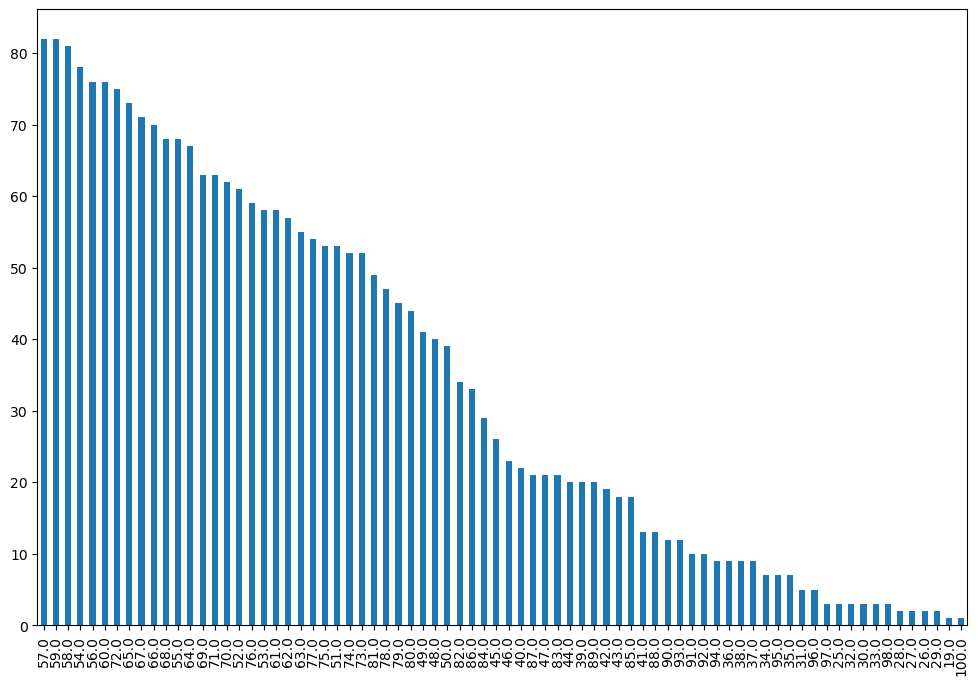

In [29]:
forbes_df["age"]
y=forbes_df["age"].value_counts()
y.plot(kind='bar', x='x', y='y', figsize=(12, 8))

<AxesSubplot:>

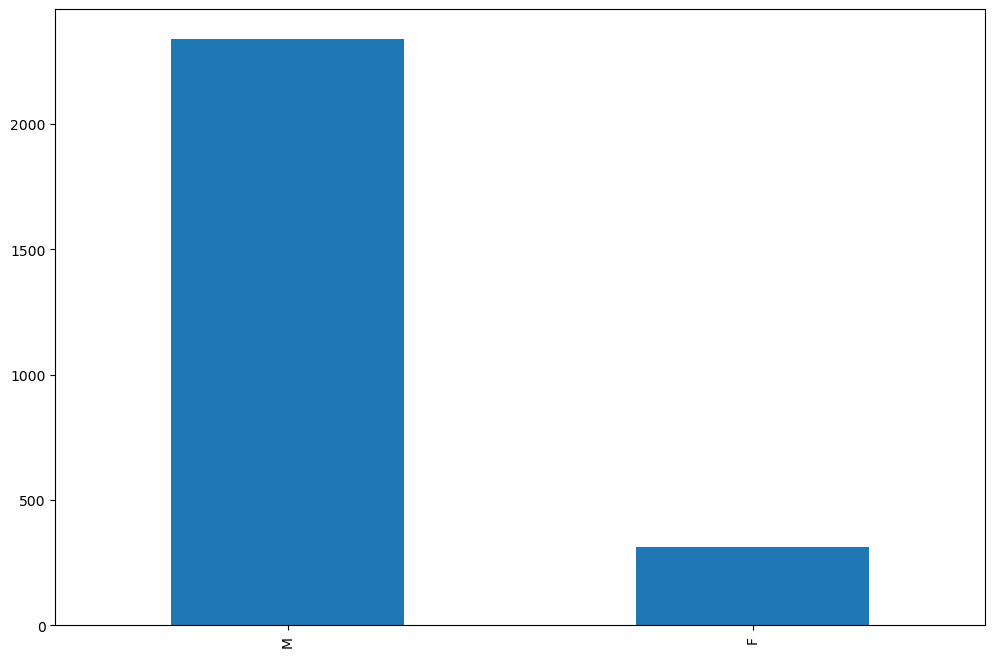

In [30]:
# ## From the above graph we can see the age for  number of billionaries in which most billionaires are around the age of fifty seven
# ## Below 35 we can see that there are very few billionaires in the world 

forbes_df["gender"].value_counts()

gend=forbes_df["gender"].value_counts()

gend.plot(kind='bar', x='x', y='y', figsize=(12, 8))


<AxesSubplot:>

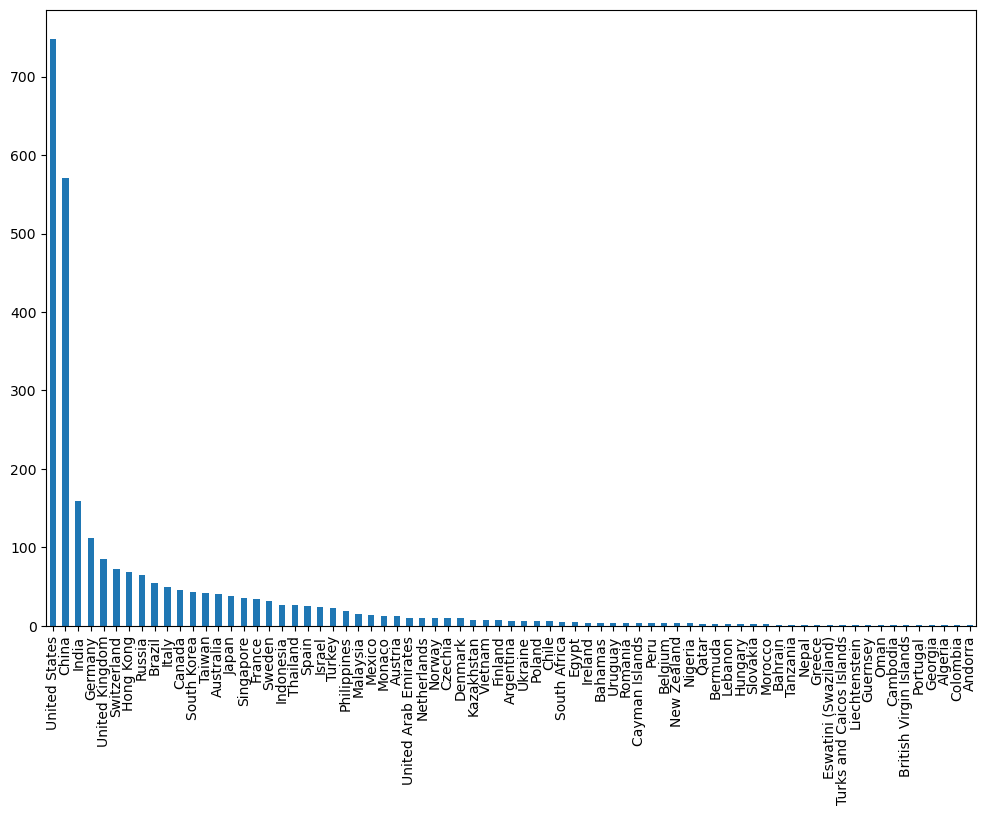

In [31]:
forbes_df["country"].value_counts()
con=forbes_df["country"].value_counts()

con.plot(kind='bar', x='x', y='con', figsize=(12, 8))


In [34]:
y=forbes_df[forbes_df["selfMade"]==True]
num_selfMade = (y.shape[0]/forbes_df.shape[0]*100)
num_selfMade
# ## accoridng to the calculation above, 70.877% of billionaires in the wolrd are self made our started from zero to become billioaires

forbes_df["Worth"]=forbes_df["finalWorth"]/1000

forbes_df["Worth"].sum()

12705.949999999999

In [33]:
# ## The billionaires have a total data set of 12.7 trillion 
# ## Self made percentage difference between male and females 

m=forbes_df[forbes_df["gender"]=="M"]
m_selfMade=m[m["selfMade"]==True]
m_selfMade.shape[0]/m.shape[0]

0.7646304997864161

In [36]:
f=forbes_df[forbes_df["gender"]=="F"]
w_selfMade=f[f["selfMade"]==True]
w_selfMade.shape[0]/f.shape[0]

0.28938906752411575

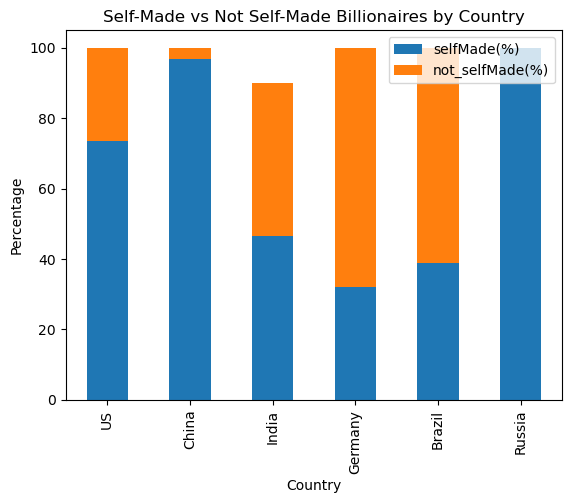

In [35]:
# ## from above we can see that 76.46% male are self made and 28.93% of women are self made billionaires  

## self made billinaires between countries US and china

c=forbes_df[forbes_df["country"]=="China"]

c_selfMade=c[c["selfMade"]==True]

c_selfMade.shape[0]/c.shape[0]

#Selfmade USA

usa=forbes_df[forbes_df["country"]=="United States"]
usa_selfMade=usa[usa["selfMade"]==True]
usa_selfMade.shape[0]/usa.shape[0]


# ## 73.529% of billionaires in the united states are self made where as 96.8476 billionaires in china are billionaires

india=forbes_df[forbes_df["country"]=="India"]
india_selfmade=india[india["selfMade"]==True]


#Selfmade India
india_selfmade.shape[0]/india.shape[0]
i=india_selfmade.shape[0]/india.shape[0]
german=forbes_df[forbes_df["country"]=="Germany"]


#Selfmade German

german_selfmade=german[german["selfMade"]==True]
german_selfmade.shape[0]/german.shape[0]

g=german_selfmade.shape[0]/german.shape[0]

#Selfmade Brazil

brazil=forbes_df[forbes_df["country"]=="Brazil"]
selfmade_brazil=brazil[brazil["selfMade"]==True]
selfmade_brazil.shape[0]/brazil.shape[0]

#Selfmade Russia

Russia=forbes_df[forbes_df["country"]=="Russia"]

selfMade_Russia=Russia[Russia["selfMade"]==True]

selfMade_Russia.shape[0]/Russia.shape[0]

data = {'Country': ['US', 'China', 'India', 'Germany', 'Brazil', 'Russia'], 'selfMade(%)': [73.5, 96.8, 46.54, 32.14, 38.89, 100], 'not_selfMade(%)': [26.5, 3.2, 43.46, 67.86, 61.11,
 0]}


df_selfm = pd.DataFrame(data, columns=['Country', 'selfMade(%)', 'not_selfMade(%)'])
ax = df_selfm.plot(kind='bar', stacked=True, x="Country")

ax.set_xlabel('Country')
ax.set_ylabel('Percentage')
ax.set_title('Self-Made vs Not Self-Made Billionaires by Country')

plt.show()




# ## The above graph shows a stacked graph of selfMade and people who aren't selfmade


Questions and answers

In [9]:
#Question: where is the most famous locations in the world 
country=forbes_df['country']
country.describe()

count              2655
unique               73
top       United States
freq                748
Name: country, dtype: object

In [10]:
#Question: where is the most famous locations in USA 
USA= forbes_df[forbes_df['country']=='United States']
State= USA["state"]
State.max()

'Wyoming'

In [11]:
#Question: what is the top most category in the world 
job=forbes_df['category']
job.describe()

count                      2668
unique                       18
top       Finance & Investments
freq                        392
Name: category, dtype: object

In [13]:
#Question: how much is in Technology
tech=forbes_df[forbes_df['category']=='Technology']
tech

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about,Worth
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g...",171.0
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re...",129.0
5,6,Larry Page,49.0,111000.0,2022,4,Technology,Google,United States,California,...,True,M,1973-03-26,Entrepreneur,1.0,"San Jose, CA",NaN,"Larry Page stepped down as CEO of Alphabet, th...",Page has avoided public appearances since Sund...,111.0
6,7,Sergey Brin,48.0,107000.0,2022,4,Technology,Google,United States,California,...,True,M,1973-08-21,Cofounder and board member,1.0,"San Jose, CA",NaN,Sergey Brin stepped down as president of Alpha...,"The richest immigrant in America, Brin has bee...",107.0
7,8,Larry Ellison,77.0,106000.0,2022,4,Technology,software,United States,Hawaii,...,True,M,1944-08-17,CTO and Founder,1.0,NaN,NaN,"Larry Ellison is chairman, chief technology of...",Ellison never finished college. He started out...,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2578,Shigefumi Wada & family,69.0,1000.0,2022,4,Technology,software,Japan,NaN,...,True,M,1952-08-30,NaN,NaN,NaN,NaN,Shigefumi Wada is president and founder of pub...,NaN,1.0
2656,2578,Shintaro Yamada,44.0,1000.0,2022,4,Technology,mobile apps,Japan,NaN,...,True,M,1977-09-21,NaN,NaN,NaN,NaN,Shintaro Yamada founded the online used-goods ...,Yamada is a big fan of retired Japanese pitche...,1.0
2657,2578,Mark Haoyong Yang,47.0,1000.0,2022,4,Technology,e-commerce,China,NaN,...,True,M,1974-08-16,NaN,NaN,NaN,NaN,"Mark Yang, also known as Yang Haoyong, is the ...",NaN,1.0
2660,2578,Ye Qiongjiu,67.0,1000.0,2022,4,Technology,software,China,NaN,...,True,F,1954-10-14,NaN,NaN,NaN,NaN,Ye Qiongjiu is deputy general manager of Hithi...,NaN,1.0


In [14]:
tech.describe()

,rank,age,finalWorth,year,month,philanthropyScore,numberOfSiblings,Worth
count,343.000000,333.000000,343.000000,343.0,343.0,74.000000,10.00000,343.000000
mean,1286.276968,56.048048,6362.682216,2022.0,4.0,1.878378,3.10000,6.362682
std,784.642737,13.079142,16767.561478,0.0,0.0,1.006182,1.72884,16.767561
min,2.000000,27.000000,1000.000000,2022.0,4.0,1.000000,1.00000,1.000000
25%,601.000000,47.000000,1500.000000,2022.0,4.0,1.000000,2.25000,1.500000
50%,1292.000000,56.000000,2400.000000,2022.0,4.0,2.000000,3.00000,2.400000
75%,1929.000000,66.000000,4700.000000,2022.0,4.0,2.000000,3.75000,4.700000
max,2578.000000,93.000000,171000.000000,2022.0,4.0,5.000000,7.00000,171.000000


In [15]:
#Question: where is the most and least famous country for technology?
cont= tech['country'].dropna()
cont.value_counts()

United States           150
China                    88
India                    15
South Korea              11
Taiwan                   11
Japan                     9
Germany                   9
Australia                 8
Canada                    5
Israel                    5
Singapore                 4
Czechia                   4
Hong Kong                 3
Netherlands               3
United Kingdom            3
Indonesia                 3
Denmark                   2
Switzerland               2
Sweden                    2
Argentina                 1
United Arab Emirates      1
Brazil                    1
Russia                    1
Name: country, dtype: int64

In [16]:
#Question: where is the most and least famous location for technology?
loc=tech['state'].dropna()
loc.value_counts()

#percetange ?, 

California        81
Washington         9
Texas              7
Florida            6
New York           6
Massachusetts      5
Georgia            5
Utah               5
Nevada             4
Illinois           4
Missouri           3
Virginia           2
Arizona            2
North Carolina     2
Hawaii             2
Kansas             1
Wisconsin          1
Oklahoma           1
Pennsylvania       1
Colorado           1
Maryland           1
Minnesota          1
Name: state, dtype: int64

In [17]:
#Question: where is the most and least famous organization for technology?
org=tech['organization'].dropna()
org.value_counts()

Meta Platforms               4
DJI Technology Co.           2
AirBnB                       2
Uber Technologies Inc.       2
Yahoo!                       2
                            ..
Garmin Corporation           1
Symphony Technology Group    1
Groupon                      1
Instacart                    1
Sutter Hill Ventures         1
Name: organization, Length: 81, dtype: int64

In [18]:
tech.max()

/var/folders/9s/_42jg5ds12l364yqldkmcvvw0000gn/T/ipykernel_22416/4279721983.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tech.max()


rank                                                                 2578
personName                                                     Zhu Yiming
age                                                                  93.0
finalWorth                                                       171000.0
year                                                                 2022
month                                                                   4
category                                                       Technology
source                                           wireless networking gear
countryOfCitizenship                                        United States
selfMade                                                             True
philanthropyScore                                                     5.0
numberOfSiblings                                                      7.0
bio                     Zhu Yiming chairs Shenzhen-listed GigaDevice S...
Worth                                 

Web scrapping

In [19]:
#web scrapping, Use requests to get the HTML from this page and BeautifulSoup to turn it into soup.

forbes_url= 'https://www.forbes.com/billionaires/'
f_resp= requests.get(forbes_url)
soup=BeautifulSoup(f_resp.content, 'html.parser')
soup

<!DOCTYPE html>
<html><head><meta charset="utf-8"/><meta content="#000000" name="theme-color"/><title>Forbes Billionaires 2023: The Richest People In The World</title><link href="https://i.forbesimg.com/favicon.ico" rel="shortcut icon"/><link href="https://www.forbes.com/billionaires/" rel="canonical"/><meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=yes" name="viewport"/><meta content="origin-when-cross-origin" name="referrer"/><meta content="Forbes presents the 2023 World's Billionaires List. View the richest people in the world including the youngest billionaires, female billionaires and newest billionaires." itemprop="description" name="description"/><meta content="billionaires, the world's billionaires, how many billionaires are there in the world, how many billionaires in the us, how many billionaires are there, wealth, Jeff Bezos, Kylie Jenner, Elon Musk, Kylie, Steward, Bezos, Laurene Powell Jobs, Donald Trump, richest people in the world, world’s

In [20]:
#find all the links
links_text = [link.text for link in soup.find_all('a')]

# And print them out
for l in links_text:
    print(l)



AdChoices
Privacy Statement
Do Not Sell or Share My Personal Information
Limit the Use of My Sensitive Personal Information
Digital Terms of Sale
Terms and Conditions
Contact Us
Send Us Feedback
Report a Security Issue
Jobs At Forbes
Reprints & Permissions
Forbes Press Room
Advertise
Investors


In [21]:
#parsing through the 
url="https://images.forbes.com/forbes-worlds-billionaires-list-2023/16x9-billies-2023-lander.jpg&quot"
re= requests.get(url)
r_soup= BeautifulSoup(re.content, 'html.parser')
r_soup

<html>
<head><title>404 Not Found</title></head>
<body>
<center><h1>404 Not Found</h1></center>
<hr/><center>nginx</center>
</body>
</html>

In [22]:
#Worlds richest
Bernard_url= 'https://www.forbes.com/profile/bernard-arnault/?list=billionaires&sh=693815d766fa'
Bernard_url_resp= requests.get(Bernard_url)
soup=BeautifulSoup(Bernard_url_resp.content, 'html.parser')
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="en_US" http-equiv="Content-Language"/><meta content="width=device-width,initial-scale=1,maximum-scale=5,minimum-scale=1,user-scalable=yes" name="viewport"/><title itemprop="headline">Bernard Arnault &amp; family</title><link href="https://i.forbesimg.com/48X48-F.png" rel="shortcut icon"/><link href="https://www.forbes.com/profile/bernard-arnault/" rel="canonical"/><meta content="origin-when-cross-origin" name="referrer"/><meta content="#1 Bernard Arnault &amp; family on the 2023 Billionaires - Bernard Arnault oversees the LVMH empire of 75 fashion and cosmetics brands, including Louis Vuitton" itemprop="description" name="description"/><meta content="Bernard Arnault &amp; family" name="keywords"/><meta content="Forbes" property="og:site_name"/><meta content="Bernard Arnault &amp; family" property="og:title"/><meta content="website" property="og:type"/><meta content="https://www.forbes.com/profile/bernard-arnaul

In [23]:
#Getting the networth of the richest individual
Bernard=soup.find_all('div',{"class":"profile-info__item-value"})
for item in Bernard:
    print(item.text)

$237.6B
$211B


In [24]:
#getting the url for specific billionares 
#there is an error in this code because it doesnt  
url='https://www.forbes.com/profile/'
forbes_df['name']= forbes_df['personName'].apply(str.lower)
names = forbes_df['name'].str.replace(' ','-')
link = ""
for name in names:
    if '-&' in name:
        new_name = name.replace("-&-family", " ")
        link = url + new_name
        print(link)
    elif ',-iii.' in name:
        new_name = name.replace(",-iii.", " ")
        link = url + new_name
        
    elif ',-jr.' in name:
        new_name = name.replace(",-jr.", " ")
        link = url + new_name
    elif '-&' in name:
        new_name = name.replace("-&-brother", " ")
        link = url + new_name
    
    else:
        link= url + names
        

https://www.forbes.com/profile/bernard-arnault 
https://www.forbes.com/profile/gautam-adani 
https://www.forbes.com/profile/carlos-slim-helu 
https://www.forbes.com/profile/francoise-bettencourt-meyers 
https://www.forbes.com/profile/julia-koch 
https://www.forbes.com/profile/david-thomson 
https://www.forbes.com/profile/phil-knight 
https://www.forbes.com/profile/rodolphe-saadé 
https://www.forbes.com/profile/françois-pinault 
https://www.forbes.com/profile/beate-heister-&-karl-albrecht-jr. 
https://www.forbes.com/profile/german-larrea-mota-velasco 
https://www.forbes.com/profile/leonardo-del-vecchio 
https://www.forbes.com/profile/tadashi-yanai 
https://www.forbes.com/profile/iris-fontbona 
https://www.forbes.com/profile/thomas-frist,-jr. 
https://www.forbes.com/profile/rupert-murdoch 
https://www.forbes.com/profile/reinhold-wuerth 
https://www.forbes.com/profile/theo-albrecht,-jr. 
https://www.forbes.com/profile/yang-huiyan 
https://www.forbes.com/profile/fan-hongwei 
https://www.fo

In [25]:
#getting Indias richest persons network chart 
net=soup.find_all('canvas',{"class":"person-networth-chart"})
net 

[<canvas class="person-networth-chart" data-chart='[{"percent":15.876777251184834,"worth":"$33.5B","name":"Billionaires","date":"March 2014"},{"percent":17.6303317535545,"worth":"$37.2B","name":"Billionaires","date":"March 2015"},{"percent":16.113744075829384,"worth":"$34B","name":"Billionaires","date":"March 2016"},{"percent":19.66824644549763,"worth":"$41.5B","name":"Billionaires","date":"March 2017"},{"percent":34.12322274881517,"worth":"$72B","name":"Billionaires","date":"March 2018"},{"percent":36.018957345971565,"worth":"$76B","name":"Billionaires","date":"March 2019"},{"percent":36.018957345971565,"worth":"$76B","name":"Billionaires","date":"April 2020"},{"percent":71.09004739336493,"worth":"$150B","name":"Billionaires","date":"April 2021"},{"percent":74.88151658767772,"worth":"$158B","name":"Billionaires","date":"April 2022"},{"percent":100,"worth":"$211B","name":"Billionaires","date":"April 2023"}]'></canvas>]